In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('BostonHousing.csv')
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

,0
Crime_rate,0
zn,0
indus,0
chas,0
nox,0
rm,5
Age,0
Distance,0
rad,0
tax,0


In [5]:
df['rm']=df['rm'].fillna(df['rm'].mean())

In [6]:
df.isnull().sum()

,0
Crime_rate,0
zn,0
indus,0
chas,0
nox,0
rm,0
Age,0
Distance,0
rad,0
tax,0


In [7]:
x=df.drop('medv',axis=1)
y=df['medv']

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))\

model.compile(loss='mae',optimizer='adam',metrics=['mse','mae'])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 22.0365 - mae: 22.0365 - mse: 562.3801
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.1534 - mae: 20.1534 - mse: 487.9575  
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.0528 - mae: 18.0528 - mse: 432.7691
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9547 - mae: 11.9547 - mse: 230.2100 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.3169 - mae: 8.3169 - mse: 117.4609
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0313 - mae: 8.0313 - mse: 117.1383  
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0080 - mae: 7.0080 - mse: 97.0153  
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1134 - mae: 6.1134 - mse: 77.1922 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8932 - mae: 5.8932 - mse: 81.1079  
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8952 - mae: 4.8952 - mse: 51.8366 
Epoch 11/100
12/12 ━━━━

In [13]:
loss_nn,mse_nn,mae_nn=model.evaluate(X_test,y_test)

print('Mean absolute error on test data: ', mae_nn)
print('Mean squared error on test data: ', mse_nn)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6110 - mae: 2.6110 - mse: 15.6085
Mean absolute error on test data:  2.612494707107544
Mean squared error on test data:  17.23429298400879


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


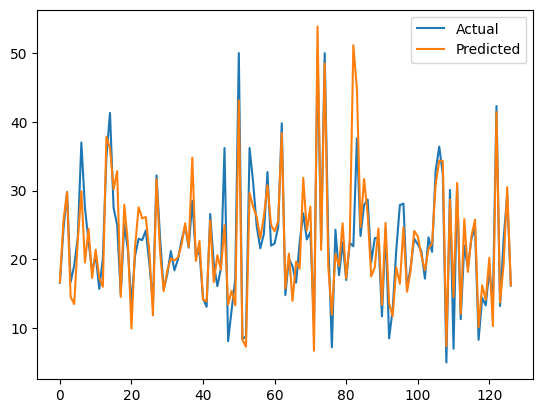

In [14]:
y_pred=model.predict(X_test)
y_test=np.array(y_test).reshape(-1,1)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
